In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas._libs.lib import is_decimal
from pandas.core.dtypes.inference import is_number
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def get_csv(file_name):
  file_path = "/content/drive/My Drive/Data/" + file_name + ".csv"
  data = pd.read_csv(file_path)
  return data

In [ ]:
def getData():
  data = get_csv("AIPerformance")
  #split data into arrays
  attempt = np.asarray(data.iloc[:,0].values)
  time = np.asarray(data.iloc[:,1].values)
  performance = np.asarray(data.iloc[:,2].values)
  return attempt, time, performance

In [ ]:
def plotData(filter, filterByAttempt):
  #plot data
  attemptNo = attempt[0]
  index = 0
  for x in range(0, attempt.shape[0]):
    if(attempt[x] != attemptNo and np.char.isnumeric(attempt[x])):
      #remove anomolies - currently caused by robots falling off terrain
      if(np.max(performance[index : x - 1].astype(float) > filter) and (filterByAttempt.size == 0 or np.isin(attemptNo, filterByAttempt))): 
        plt.plot(time[index : x-1].astype(float), performance[index : x-1].astype(float), label=attemptNo)
      attemptNo = attempt[x]
      index = x
  if(np.max(performance[index : ].astype(float) > filter) and ((filterByAttempt.size == 0 or np.isin(attemptNo, filterByAttempt)))): 
    plt.plot(time[index : ].astype(float), performance[index : ].astype(float), label=attemptNo)

  # plt.legend(loc="lower left", mode = "expand", ncol = 7)
  plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=7)
  plt.xlabel('Time')
  plt.ylabel('Performance')
  plt.title('Highest performing upward trending iterations')

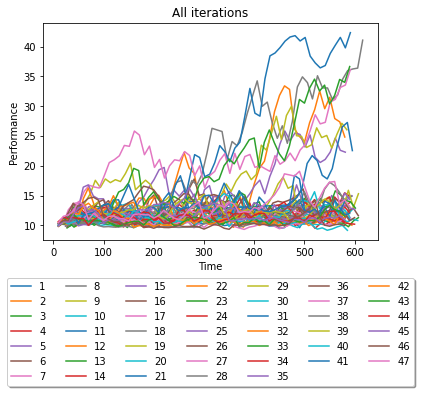

In [ ]:
#plot all
attempt, time, performance = getData()
plotData(0, np.empty(0))

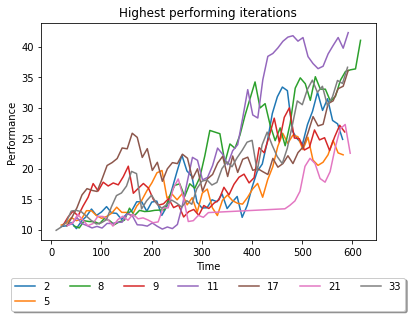

In [ ]:
#plot all filtered to decent achievers
attempt, time, performance = getData()
plotData(20, np.empty(0))

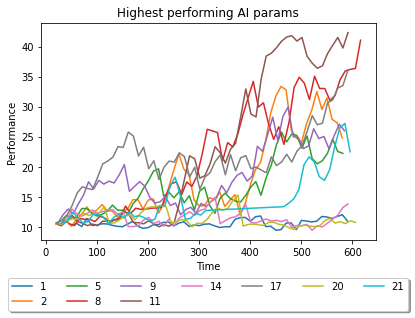

In [ ]:
#plot all with default AI params
attempt, time, performance = getData()
duplicateAttempts = np.array(["1", 2, 5, 8, 9, 11, 14, 17, 20, 21])
plotData(0, duplicateAttempts)

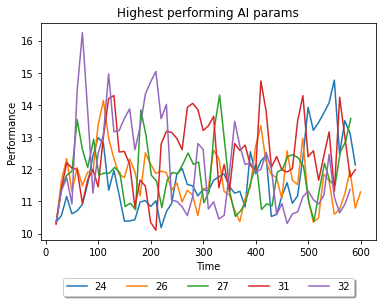

In [ ]:
#plot all with another group of random values
attempt, time, performance = getData()
duplicateAttempts = np.array(["24", 26, 27, 31, 32])
plotData(0, duplicateAttempts)

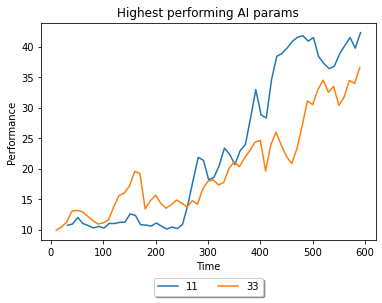

In [ ]:
#plot all unique
attempt, time, performance = getData()
uniqueAttempts = np.array(["3", 4, 6, 7, 10, 11, 12, 13, 15, 16, 18, 19, 22, 23, 25, 28, 29, 30, 31, 33])
plotData(20, uniqueAttempts)

In [ ]:
#refined
attempt, time, performance = getData()
uniqueAttempts = np.array(["34", 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])
plotData(0, uniqueAttempts)

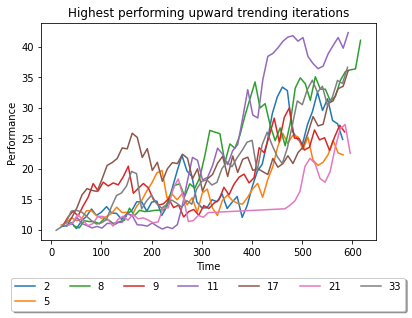

In [ ]:
#looking for pattern
attempt, time, performance = getData()
uniqueAttempts = np.array(["2", 4, 5, 8, 9, 11, 15, 17, 19, 21, 23, 33, 38, 47])
plotData(20, uniqueAttempts)